# Topic Modeling Analysis

This notebook performs topic modeling analysis on news articles about AI.
It extracts key topics, performs BERTopic analysis, and visualizes key phrases.

## Setup

In [1]:
import os, re, json, time, math, random, textwrap, itertools
from datetime import datetime, timedelta, timezone
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from dateutil import tz
import requests
from tqdm import tqdm
from bertopic import BERTopic
from wordcloud import WordCloud

# NLTK / VADER
import nltk
nltk.download('vader_lexicon', quiet=True)
nltk.download('stopwords')
from nltk.sentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

# Embeddings + topics
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer("all-MiniLM-L6-v2")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilydonofrio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


## Load Data

In [2]:
# load the processed data
df_all = pd.read_csv('../Data/processed_data_all.csv')
labeled_df = pd.read_csv('../Data/processed_data_labeled.csv')

## Section 7: Topic Modeling

What are the topics within AI that these articles are focused on? <br>

Topic modeling with BERTopic can cluster these articles based on similarities and assign topic names to summarize the group.

#### 7.1 Topic Modeling on All Sources

In [3]:
df_all.shape

(2061, 11)

In [4]:
from bertopic import BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df_all['text'])
topic_model.get_topic_info()

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


,Topic,Count,Name,Representation,Representative_Docs
0,-1,722,-1_ai_the_and_to,"[ai, the, and, to, of, in, is, for, with, on]",[Unlock AI Power Locally: Learn How to Create ...
1,0,100,0_language_models_pytorch_llms,"[language, models, pytorch, llms, large, model...","[Under the Hood of vLLM: Memory, Scheduling & ..."
2,1,97,1_security_threat_ransomware_cybersecurity,"[security, threat, ransomware, cybersecurity, ...",[Akeyless introduces AI Agent Identity Securit...
3,2,66,2_nvidia_amd_chips_and,"[nvidia, amd, chips, and, qualcomm, with, ai, ...",[Investors are cheering Qualcomm's new chip th...
4,3,62,3_sora_video_app_veo,"[sora, video, app, veo, openai, videos, 31, op...",[OpenAI suspends MLK deepfakes on Sora after ‘...
5,4,61,4_copilot_windows_microsoft_11,"[copilot, windows, microsoft, 11, clippy, mode...",[Microsoft Copilot can now create Office 365 d...
6,5,53,5_bubble_the_ai_bank,"[bubble, the, ai, bank, burst, dotcom, of, say...",[Waiting for the Wheels to Come Off as Jamie D...
7,6,47,6_gemini_google_home_googles,"[gemini, google, home, googles, users, for, it...",[Gemini Enterprise brings together all of Goog...
8,7,44,7_image_adobe_generator_firefly,"[image, adobe, generator, firefly, new, adobes...",[Adobe Max 2025: all the latest creative tools...
9,8,38,8_agentic_agents_ai_agent,"[agentic, agents, ai, agent, how, to, workforc...",[The Next Retail Shake-Up: AI Agents That Rede...


In [5]:
topic_model.reduce_topics(df_all['text'], nr_topics=10)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,722,-1_the_ai_and_to,"[the, ai, and, to, of, in, is, for, on, with]",[Adobe Struggles To Assure Investors That It C...
1,0,954,0_the_ai_to_and,"[the, ai, to, and, of, in, for, is, with, on]",[A New Era of Business: The AI & Data Revoluti...
2,1,172,1_nvidia_the_coreweave_ai,"[nvidia, the, coreweave, ai, to, and, is, on, ...",[(PR) NVIDIA and TSMC Celebrate First NVIDIA B...
3,2,74,2_google_gemini_to_the,"[google, gemini, to, the, for, of, and, its, g...",[Gemini's October drop brings powerful AI upgr...
4,3,33,3_laptop_ssd_gaming_price,"[laptop, ssd, gaming, price, this, amazon, ram...","[HP Drops Early Black Friday Deal, 16″ Gaming ..."
5,4,27,4_rebelforge_rebel_qloralora_configdriven,"[rebelforge, rebel, qloralora, configdriven, f...",[rebel-forge 0.2.0 — Config-driven QLoRA/LoRA ...
6,5,23,5_mamba_kobe_black_nike,"[mamba, kobe, black, nike, the, bryant, protro...",[Nike Kobe 9 EM Protro “China” Releases On Nov...
7,6,22,6_rag_generation_retrieval_retrievalaugmented,"[rag, generation, retrieval, retrievalaugmente...",[insta-rag 0.1.1b0 — A RAG (Retrieval-Augmente...
8,7,20,7_45_haiku_claude_anthropic,"[45, haiku, claude, anthropic, sonnet, model, ...","[Claude Haiku 4.5 — Claude Haiku 4.5, our late..."
9,8,14,8_channing_jax_tatum_taylor,"[channing, jax, tatum, taylor, roommates, were...",[Channing Tatum Finally Addresses Jax Taylor C...


In [6]:
# How do the topics change if we remove stopwords
#from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

 # remove stop words
df_all['text_no_sw'] = df_all['text'].apply(lambda x: [word for word in x.split() if word not in stop_words])
# Join tokens back into string for BERTopic
df_all['text_no_sw'] = df_all['text_no_sw'].apply(lambda x: ' '.join(x))

df_all['text_no_sw'] = df_all['text_no_sw'].fillna("").astype(str)
df_all = df_all[df_all['text_no_sw'].str.strip() != ""]

topic_model2 = BERTopic()
topics2, probs2 = topic_model2.fit_transform(df_all['text_no_sw'].tolist())
topic_model2.get_topic_info()

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


,Topic,Count,Name,Representation,Representative_Docs
0,-1,805,-1_ai_the_new_meta,"[ai, the, new, meta, one, us, says, in, models...","[AI Poses Threat To Some Content, Ted Sarandos..."
1,0,108,0_security_threat_cybersecurity_ransomware,"[security, threat, cybersecurity, ransomware, ...",[Akeyless introduces AI Agent Identity Securit...
2,1,107,1_agentic_agents_agent_github,"[agentic, agents, agent, github, ai, code, cod...",[Completing urgent fixes anywhere GitHub Copil...
3,2,84,2_bubble_stocks_ai_market,"[bubble, stocks, ai, market, says, analyst, re...",[Analyst Zoom (ZM): ‘This Is Not Growth Story’...
4,3,68,3_nvidia_amd_chips_qualcomm,"[nvidia, amd, chips, qualcomm, nvidias, dgx, i...",[Microsoft Azure delivers first large scale cl...
5,4,57,4_sora_video_app_veo,"[sora, video, app, veo, openai, videos, 31, co...",[Android users soon get experience OpenAI's vi...
6,5,57,5_copilot_windows_microsoft_11,"[copilot, windows, microsoft, 11, clippy, mico...",[Microsoft Copilot create Office 365 docs sync...
7,6,55,6_chatgpt_openai_browser_atlas,"[chatgpt, openai, browser, atlas, users, opena...","[OpenAI Launches ChatGPT Atlas, Challenging Go..."
8,7,43,7_gemini_google_home_googles,"[gemini, google, home, googles, tv, users, sea...",[Gemini Enterprise brings together Google’s AI...
9,8,42,8_adobe_image_creative_firefly,"[adobe, image, creative, firefly, generator, a...",[Adobe Max 2025: latest creative tools AI anno...


In [7]:
pd.set_option('display.max_colwidth', None)
df_all['topic2'] = topics2
# View all reviews in Topic 0
topic_0_articles = df_all[df_all['topic2'] == 0]['text']
topic_0_articles.sample(10)

1394       Georgia superintendent indicted over alleged kickback scheme in Illinois school district — Georgia’s DeKalb County Schools superintendent, Devon Horton, has been indicted on 17 federal charges, including wire fraud, embezzlement, and tax evasion, for allegedly running a $280,000 kickback scheme while leading Illinois’ Evanston-Skokie School Distric…
1849                                                                                                                                                                                                             The end of ransomware? Report claims the number of firms paying up is plummeting — Research shows poor performance in terms of payments across the board.
1296             The 5 generative AI security threats you need to know about detailed in new e-book — In this blog post, we’ll highlight the key themes covered in the e-book, including the challenges organizations face, the top generative AI threats to organizations, and ho

In [8]:
topic_model2.reduce_topics(df_all['text_no_sw'], nr_topics=10)
topic_model2.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,805,-1_ai_the_new_one,"[ai, the, new, one, meta, says, us, in, models, is]","[AI researcher Andrej Karpathy says AGI still decade away, here’s — The OpenAI co-founder also admitted fallen hype around generative AI, specifically 2025 going year AI agents., PUBG maker Krafton turning ‘AI first’ developer — Krafton, company behind games PUBG: Battlegrounds Sims-like InZOI, making big push using AI within company. Under new “AI First” strategy, Krafton plans use agentic AI help automate work implement “AI-cenete…, The AI Innovations We Really Need — The Future Sustainable AI Data Centers Green Algorithms GUEST POST Art Inteligencia The rise Artificial Intelligence represents monumental leap human capability, yet carries unsustainable hidden cost. Today’s large language models (L…]"
1,0,810,0_ai_the_new_copilot,"[ai, the, new, copilot, agentic, bubble, security, agents, microsoft, google]","[New Research: AI Is Already #1 Data Exfiltration Channel Enterprise — For years, security leaders treated artificial intelligence “emerging” technology, something keep eye yet mission-critical. A new Enterprise AI SaaS Data Security Report AI & Browser Security company LayerX proves o…, Microsoft dubs Windows 11 PCs ""the computer talk to” launches new agentic AI voice input mode lets PC things — Windows 11 getting agentic AI assistant lets ask Copilot control apps files you. It's also making easier access Copilot Taskbar voice., Adobe Wants Firefly To Be The Only AI App Creators Need: New Features And AI Agents — Adobe unveiled new AI features Firefly, Photoshop, Premiere, including new Image Model 5 tool creative agentic experiences.]"
2,1,175,1_openai_nvidia_chatgpt_ai,"[openai, nvidia, chatgpt, ai, amd, microsoft, the, nvidias, first, company]","[OpenAI’s Next Bet: Intel Stock? — As Nvidia AMD solidify roles heart OpenAI’s compute strategy, could Intel - long seen outsider AI hardware race - surprise similarly large partnership OpenAI?, Microsoft Azure delivers first large scale cluster NVIDIA GB300 NVL72 OpenAI workloads — Microsoft delivers first at-scale production cluster 4,600 NVIDIA GB300 NVL72, featuring NVIDIA Blackwell Ultra GPUs connected next-generation NVIDIA InfiniBand network. The post Microsoft Azure delivers first large scale c…, OpenAI Launches 'ChatGPT Atlas' Browser Compete Safari Chrome — OpenAI today introduced ChatGPT Atlas, dedicated AI browser includes ChatGPT integration. OpenAI says browser designed around question ""What could chat web browser?"" There dedicated ""Ask ChatGPT"" sidebar, all…]"
3,2,85,2_claude_45_haiku_model,"[claude, 45, haiku, model, anthropic, models, language, pytorch, sonnet, ai]","[Claude 4.5 haiku Anthropic Amazon Bedrock — Claude Haiku 4.5 available Amazon Bedrock. Claude Haiku 4.5 delivers near-frontier performance matching Claude Sonnet 4's capabilities coding, computer use, agent tasks substantially lower cost faster speeds, making state-of-the-art AI…, Claude Haiku 4.5 — Claude Haiku 4.5, latest small model, available today users., Anthropic Launches Smaller, Faster Claude Haiku 4.5 AI Model — The developer said new Haiku outperforms Sonnet 4 model third cost.]"
4,3,53,3_laptop_ssd_gaming_pro,"[laptop, ssd, gaming, pro, price, amazon, ram, hp, galaxy, the]","[Once Pricier Than MacBook, Dell’s Laptop Bundle Now Costs Less After 72% Price Cut (64GB RAM, 2TB SSD) — Save $2,000 awesome bundle including 15.6-inch Intel-powered laptop, Windows 11 Professional, USB hub, more. The post Once Pricier Than MacBook, Dell’s Laptop Bundle Now Costs Less After 72% Price Cut (64GB RAM, 2TB SSD) appeared first …, HP Drops Early Black Friday Deal, 16″ Gaming Laptop Going Nearly Free Amazon — You blow budget grab solid gaming laptop known brand. The post HP Drops Early Black Friday Deal, 16″ Gaming Laptop Going Nearly Free Amazon appeared first Kotaku., This HP Laptop (32GB RAM, 1TB SSD) 72% Off Is Tasty Worm Every Early Bird Wants Before Black Fri

7.2 Topics within Source Categories

In [9]:
labeled_df.shape

(151, 19)

In [10]:
topic_model3 = BERTopic()
topics3, probs3 = topic_model3.fit_transform(labeled_df['text'])
topic_model3.get_topic_info()

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


,Topic,Count,Name,Representation,Representative_Docs
0,-1,27,-1_to_the_and_windows,"[to, the, and, windows, microsoft, of, is, copilot, in, it]","[Microsoft's Push Into Agentic AI Begins With 'Hey Copilot' Voice Assistant in Windows 11 — Microsoft says Copilot will be an always-listening AI tool in Windows 11 for those who give it permission to function., Anthropic connects Claude to Microsoft Teams, Outlook, and OneDrive — Anthropic is integrating its Claude AI assistant with Microsoft 365 services so it can surface content from Word documents, Teams messages, and Outlook emails in conversations with the chatbot. It’s part of a series of updates to Claude to make the chatbot mo…, Copilot on Windows can now create Office documents and connect to Gmail — Microsoft is updating its Copilot app on Windows to allow it to create documents from a chat session and connect to Gmail and Outlook accounts. The updated Copilot app is rolling out initially to all Windows Insiders, ahead of a general release to all Windows…]"
1,0,92,0_ai_the_to_and,"[ai, the, to, and, of, is, in, that, for, its]","[EA partners with Stability AI for ‘transformative’ AI game-making tools — EA is partnering with Stability AI, the company that develops the Stable Diffusion AI image model, to help infuse AI into its development processes. The two companies will “co-develop transformative AI models, tools, and workflows that empower our artists, de…, PUBG maker Krafton is turning into an ‘AI first’ developer — Krafton, the company behind games such as PUBG: Battlegrounds and the Sims-like InZOI, is making a big push into using AI within the company. Under this new “AI First” strategy, Krafton plans to use agentic AI to help automate work and implement an “AI-cenete…, AI of a Thousand Faces — What happens now that AI is everywhere and in everything? WIRED can’t tell the future, but we can try to make sense of it. Behold: 17 readings from the furthest reaches of the AI age.]"
2,1,20,1_openai_the_chatgpt_to,"[openai, the, chatgpt, to, browser, app, sora, for, is, its]","[OpenAI's Sora Is Now the No. 1 Free iPhone App. Get Ready for Lots More AI Slop — On the bright side: Not everyone will be able to use the popular video app, unlike its sister app ChatGPT., Maybe it’s real, maybe it’s Sora — Big week for OpenAI! The company is running basically every tech industry playbook, all at the same time, and it actually seems to be working. The company is adding apps to ChatGPT, in an effort to turn the chatbot into something more like an operating system…, The ChatGPT Atlas browser still feels like Googling with extra steps — This week, OpenAI debuted its long-rumored AI browser that aims to put its AI chatbot at the center of the internet. The browser, called ChatGPT Atlas, is entering a space that's already occupied by Perplexity's Comet and Google Gemini in Chrome. OpenAI is li…]"
3,2,12,2_chatbots_ai_to_of,"[chatbots, ai, to, of, from, teens, ban, more, claims, under]","[Leaked Meta documents show how AI chatbots handle child exploitation — Meta's AI chatbot training rules bans sexual roleplay with minors and block access to child abuse material as regulators scrutinize its safety measures., Character.ai to ban teens from talking to its AI chatbots — The AI chatbot app, which has millions of users, said it was responding to parents and regulators., Senators propose banning teens from using AI chatbots — A new piece of legislation could require AI companies to verify the ages of everyone who uses their chatbots. Sens. Josh Hawley (R-MO) and Richard Blumenthal (D-CT) introduced the GUARD Act on Tuesday, which would also ban everyone under 18 from accessing AI …]"


In [11]:
 # remove stop words
labeled_df['text_no_sw'] = labeled_df['text'].apply(lambda x: [word for word in x.split() if word not in stop_words])
# Join tokens back into string for BERTopic
labeled_df['text_no_sw'] = labeled_df['text_no_sw'].apply(lambda x: ' '.join(x))

labeled_df['text_no_sw'] = labeled_df['text_no_sw'].fillna("").astype(str)
labeled_df = labeled_df[labeled_df['text_no_sw'].str.strip() != ""]

topic_model4 = BERTopic()
topics4, probs4 = topic_model4.fit_transform(labeled_df['text_no_sw'].tolist())
topic_model4.get_topic_info()

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


,Topic,Count,Name,Representation,Representative_Docs
0,-1,22,-1_google_ai_teslas_how,"[google, ai, teslas, how, veo, china, steering, compete, selfdriving, ray]","[Google Announces New Veo 3 AI Video Model Amid Sora Hype — Veo 3 quickly gained popularity first AI video generator include audio. Veo 3.1 upgrades help compete AIs., Google Earth’s expanded AI features make easier ask questions — Google expanding AI features within Google Earth. It’s easier chat Google Earth AI models, introduced July, identify infrastructure vulnerable oncoming storm, example, spot communities risk dust storms drou…, Google’s AI bounty program pays bug hunters $30K — On Monday, Google launched new reward program dedicated specifically finding bugs AI products. Google’s list qualifying bugs includes examples kind rogue actions it’s looking for, like indirectly injecting AI prompt causes Google …]"
1,0,85,0_ai_the_new_says,"[ai, the, new, says, ceo, tech, image, is, it, bubble]","[Adobe Max 2025: latest creative tools AI announcements — Adobe kicked annual Max design conference, it’ll giving us first glimpse latest updates coming Creative Cloud apps Firefly AI models. The creative software giant launching new generative AI tools make digital v…, I Didn't Snap This Photo Coffee Shop — Microsoft's New AI Tool Created It — The company introduces new AI image generator tries bring AI development in-house., Inside Adobe’s AI Strategy: Can It Outpace Rivals In The Creative AI Race? — At Adobe Max 2025, platform announced agentic AI upgrades across Firefly GenStudio product suite. But dominate creative AI race?]"
2,1,44,1_ai_openai_chatgpt_windows,"[ai, openai, chatgpt, windows, app, browser, users, copilot, the, like]","[Character.ai ban teens talking AI chatbots — The AI chatbot app, millions users, said responding parents regulators., OpenAI's Sora Is Now No. 1 Free iPhone App. Get Ready Lots More AI Slop — On bright side: Not everyone able use popular video app, unlike sister app ChatGPT., The ChatGPT Atlas browser still feels like Googling extra steps — This week, OpenAI debuted long-rumored AI browser aims put AI chatbot center internet. The browser, called ChatGPT Atlas, entering space that's already occupied Perplexity's Comet Google Gemini Chrome. OpenAI li…]"


**Topic Analysis Summary**
BERTopic modeling on the entire dataset produced some common topics. <br>
<br>
<br>


*   Cybersecurity - Example: Claude can be tricked into sending your private company data to hackers - all it takes is some kind words — An attacker can manipulate Claude via prompt injection to exfiltrate user data
*   Agentic AI - Example: Agentic AI Is Here to Improve Your Life, You Just Have to Believe in It
* ChatpGPT Browser - Example: The ChatGPT Atlas browser still feels like Googling with extra steps



In the smaller labelled balanced dataset, BERTopic did not appear to have enough data to create meaningful topics with, instead we can use key phrase extraction to look for commonalities.

7.3 Key Phrase Analysis on Balanced Data

In [13]:
from keybert import KeyBERT
from collections import Counter

kw_model = KeyBERT()

# extract keyphrases
labeled_df["keyphrases"] = labeled_df["text_no_sw"].apply(
    lambda x: kw_model.extract_keywords(
        x,
        keyphrase_ngram_range=(1, 3),
        stop_words='english',
        top_n=10
    )
)


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [14]:
all_phrases = []

for kp_list in labeled_df["keyphrases"]:
    all_phrases.extend([phrase for phrase, _ in kp_list])

overall_keyphrases = Counter(all_phrases).most_common(30)
overall_keyphrases


[('ai', 15),
 ('openai', 12),
 ('ai bubble', 6),
 ('chatbots', 5),
 ('ai chatbot', 4),
 ('ai chatbots', 3),
 ('ai agents', 3),
 ('ai image', 3),
 ('ai jobs', 3),
 ('chatgpt', 2),
 ('ceo says ai', 2),
 ('ai boom', 2),
 ('openai says', 2),
 ('chatgpt atlas browser', 2),
 ('browser called chatgpt', 2),
 ('called chatgpt atlas', 2),
 ('chatgpt atlas', 2),
 ('treat adult users', 2),
 ('ai image generator', 2),
 ('image generator', 2),
 ('agentic ai', 2),
 ('video app', 2),
 ('ai infrastructure deals', 2),
 ('ai strategy', 2),
 ('fox news ai', 2),
 ('phishing', 2),
 ('chatbot', 2),
 ('adobe max 2025', 2),
 ('adobe max', 2),
 ('ai bubble bursting', 1)]

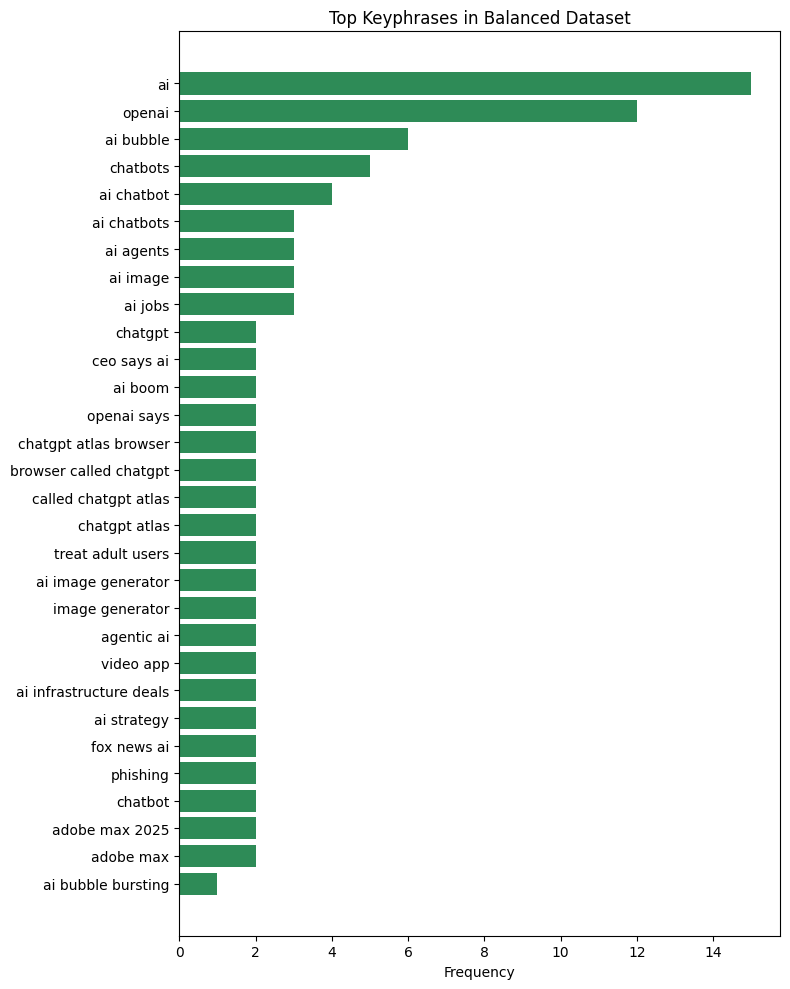

In [15]:

def plot_overall_keyphrases_bar(keyphrases):
    phrases = [p[0] for p in keyphrases]
    counts = [p[1] for p in keyphrases]

    plt.figure(figsize=(8, 10))
    plt.barh(phrases, counts, color="seagreen")
    plt.title("Top Keyphrases in Balanced Dataset")
    plt.xlabel("Frequency")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_overall_keyphrases_bar(overall_keyphrases)


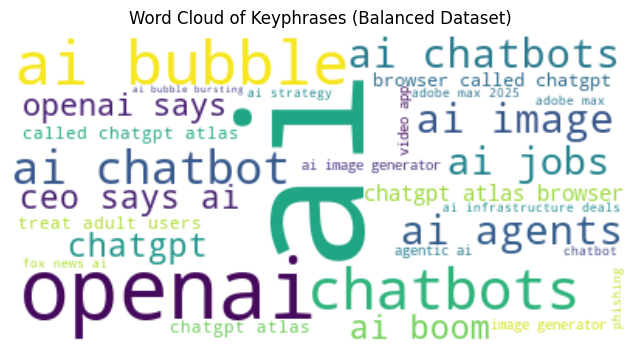

In [16]:
from wordcloud import WordCloud

def plot_overall_wordcloud(keyphrases):
    freq_dict = {phrase: count for phrase, count in keyphrases}

    wc = WordCloud(background_color="white").generate_from_frequencies(freq_dict)

    plt.figure(figsize=(8, 8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Keyphrases (Balanced Dataset)")
    plt.show()

plot_overall_wordcloud(overall_keyphrases)


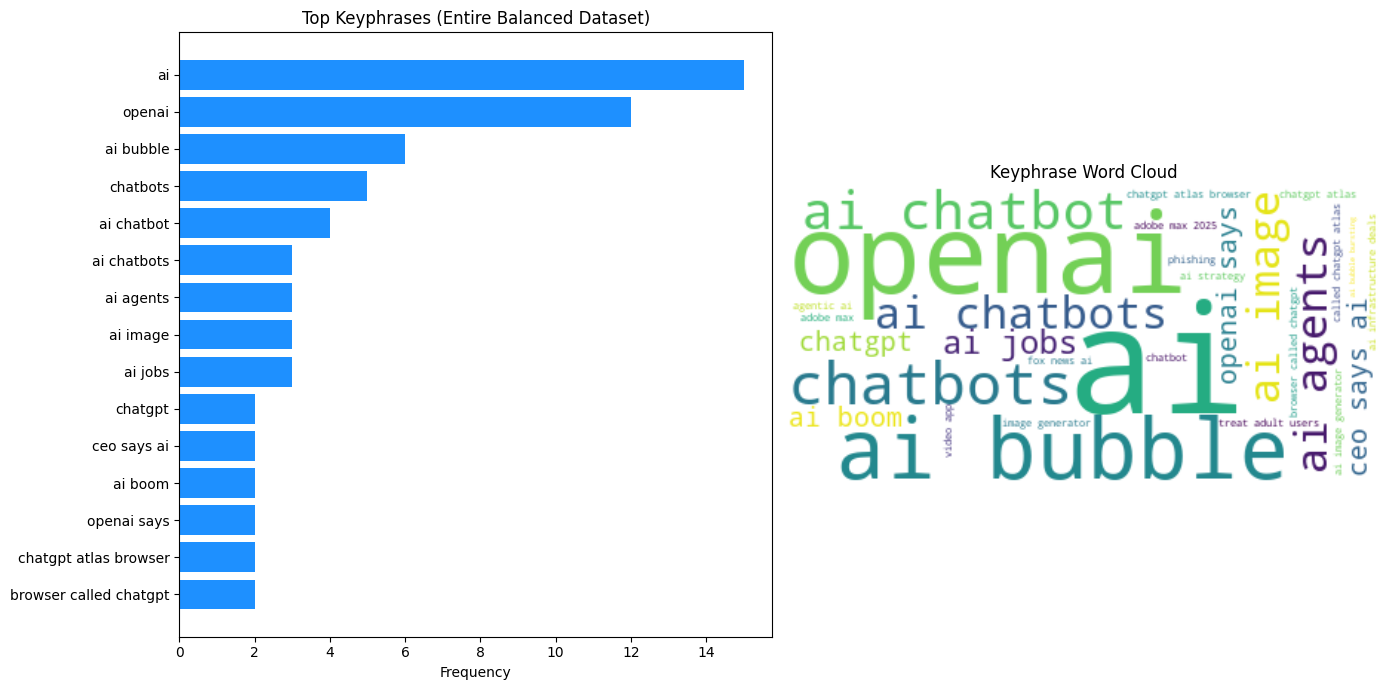

In [17]:
def plot_combined_overall(keyphrases):
    phrases = [p[0] for p in keyphrases[:15]]
    counts = [p[1] for p in keyphrases[:15]]

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    # Bar chart
    axs[0].barh(phrases, counts, color="dodgerblue")
    axs[0].invert_yaxis()
    axs[0].set_title("Top Keyphrases (Entire Balanced Dataset)")
    axs[0].set_xlabel("Frequency")

    # Word cloud
    freq_dict = {phrase: count for phrase, count in keyphrases}
    wc = WordCloud(background_color="white").generate_from_frequencies(freq_dict)

    axs[1].imshow(wc, interpolation="bilinear")
    axs[1].axis("off")
    axs[1].set_title("Keyphrase Word Cloud")

    plt.tight_layout()
    plt.show()

plot_combined_overall(overall_keyphrases)


In [18]:
def aggregate_keyphrases(df):
    phrases = []
    for kp_list in df["keyphrases"]:
        phrases.extend([p for p, s in kp_list])
    return Counter(phrases).most_common(20)

category_keyphrases = {
    cat: aggregate_keyphrases(df_cat)
    for cat, df_cat in labeled_df.groupby("category")
}


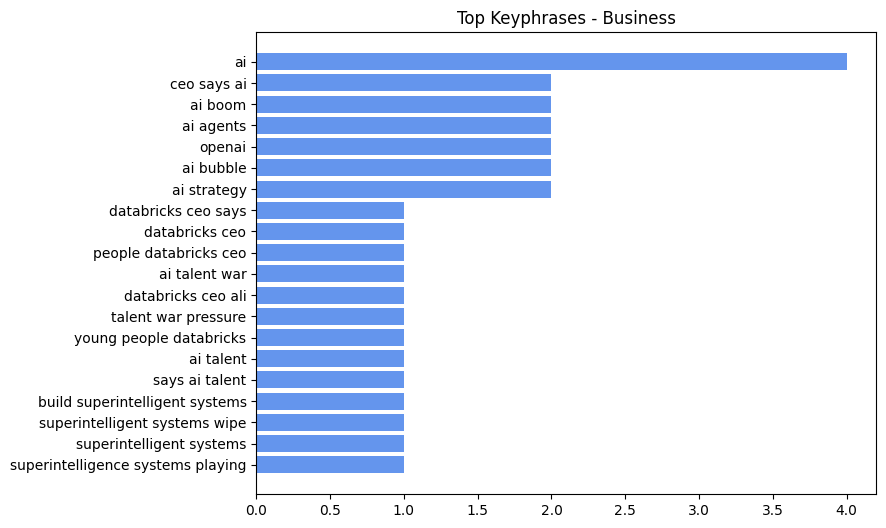

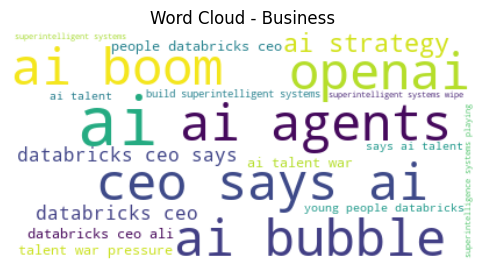

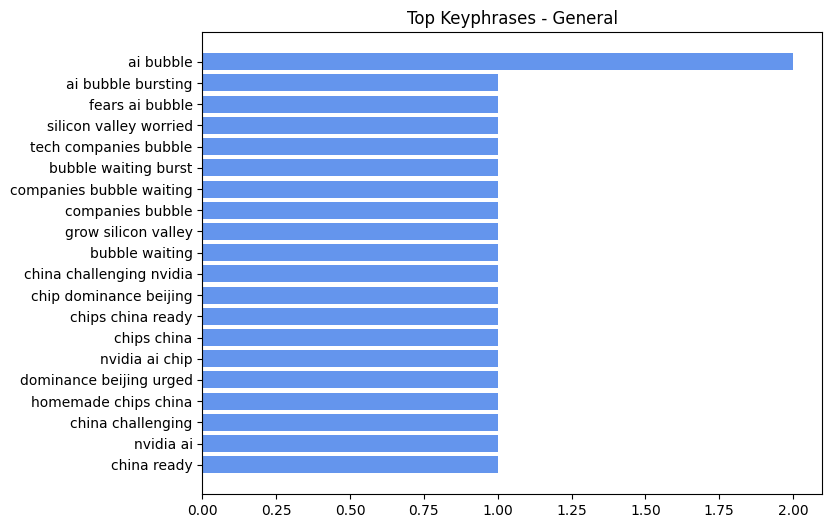

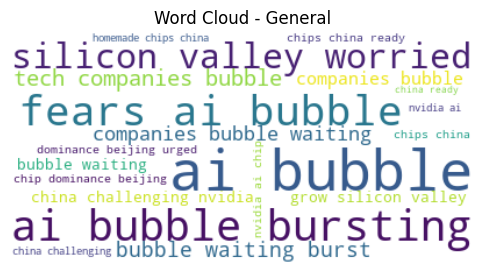

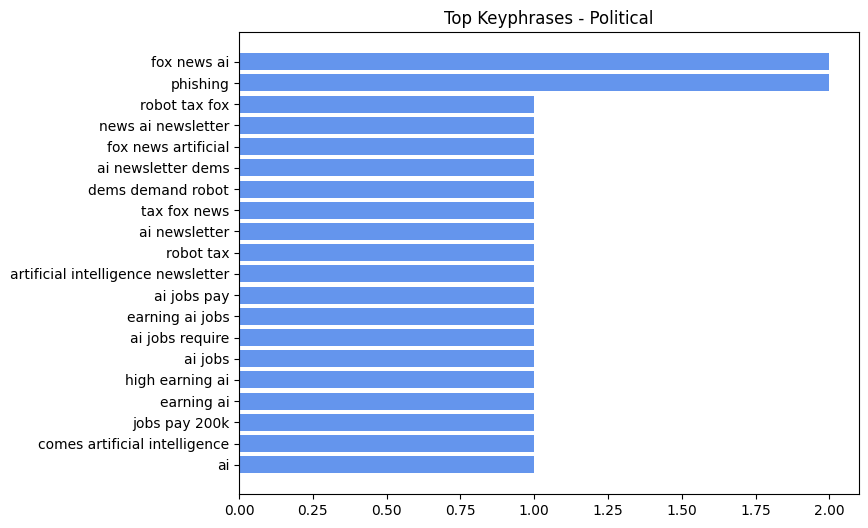

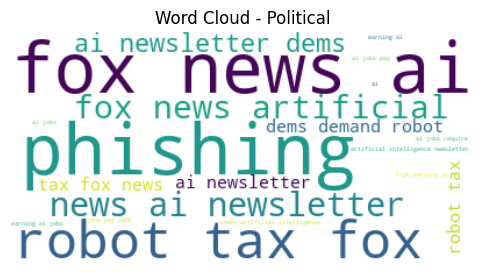

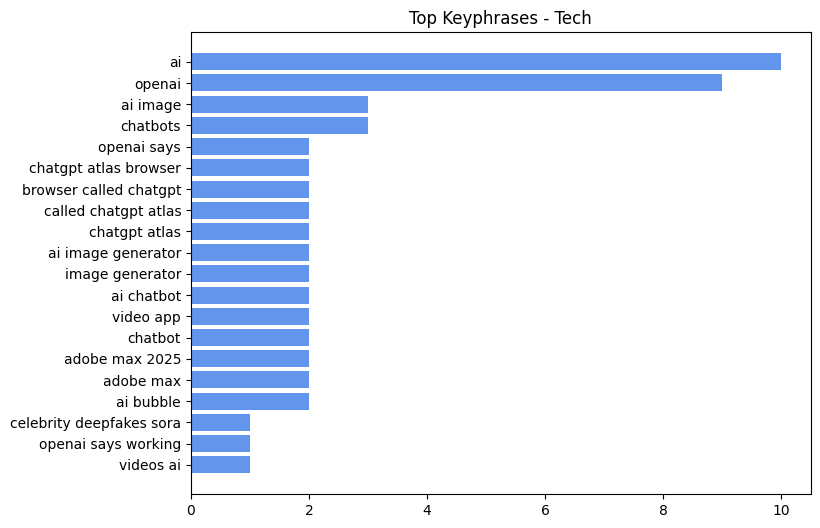

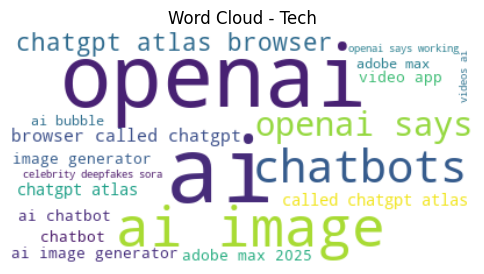

In [19]:
def plot_category_bar(category, kps):
    phrases = [p for p, c in kps]
    counts = [c for p, c in kps]

    plt.figure(figsize=(8, 6))
    plt.barh(phrases, counts, color="cornflowerblue")
    plt.gca().invert_yaxis()
    plt.title(f"Top Keyphrases - {category}")
    plt.show()

def plot_category_wordcloud(category, kps):
    freq = {p: c for p, c in kps}
    wc = WordCloud(background_color="white").generate_from_frequencies(freq)
    plt.figure(figsize=(6, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {category}")
    plt.show()

for cat, kps in category_keyphrases.items():
    plot_category_bar(cat, kps)
    plot_category_wordcloud(cat, kps)


**General:** AI Bubble, Bubble bursting <br>
**Business:** AI Agents, CEO says <br>
**Political:** Phishing, Robot Tax <br>
**Tech:** OpenAI, Chatbots